# Loading Dataset

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shpae :', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape : (10000, 28, 28)
y_test shpae : (10000,)


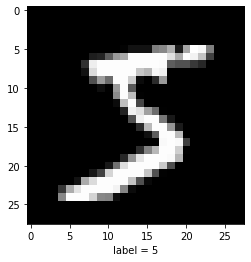

In [3]:
# plot some data
from matplotlib import pyplot as plt

image = x_train[0] 
label = y_train[0]
plt.imshow(image, cmap='gray')
plt.xlabel('label = {}'.format(label))
plt.show()

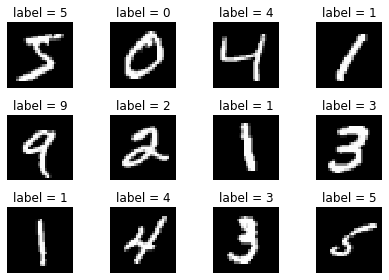

In [4]:
ROW = 3
COLUMN = 4
for i in range(ROW * COLUMN):
    image = x_train[i]
    label = y_train[i]
    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('label = {}'.format(label))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
# plt.savefig('images/mnist_plot.png')
plt.show()

In [5]:
# do some preprocessing on data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
print('after preprocess new shape of data:')
print('-' * 35)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shpae :', y_test.shape)

after preprocess new shape of data:
-----------------------------------
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape : (10000, 28, 28, 1)
y_test shpae : (10000,)


In [7]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input

inputs = Input(shape=x_train.shape[1:])

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

In [8]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                             

In [10]:
epochs = 5
history = model.fit(x=x_train, y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1973 - accuracy: 0.9375
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0690 - accuracy: 0.9797
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0554 - accuracy: 0.9840
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0469 - accuracy: 0.9860
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0426 - accuracy: 0.9875


In [11]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.0217 - accuracy: 0.9926


[0.021711215376853943, 0.9926000237464905]